In [61]:
###Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import pickle

In [62]:
df = pd.read_csv("DataSchedule-2.csv")

In [63]:
# Specify the path to the pickled model file
model_file_path = 'best_random_forest_model.pkl'

# Load the model from disk
with open(model_file_path, 'rb') as file:
    model = pickle.load(file)

In [64]:
df_features = df.drop(['set1', 'sensor_val7', 'sensor_val11', 'sensor_val14', 'sensor_val16', 'sensor_val8', 'sensor_val20', "engine_id","set2"], axis = 1)

In [65]:
#Making predictions and round to the nearest integer
predictions = np.round(model.predict(df_features))
#Converting to integer type
predictions = predictions.astype(int)

In [66]:
predictions

array([206, 212, 200, ...,  25,  24,  16])

In [67]:
## add the predictions to df
df['RUL'] = predictions

In [68]:
df

,engine_id,cycle,set1,set2,set3,sensor_val1,sensor_val2,sensor_val3,sensor_val4,sensor_val5,...,sensor_val13,sensor_val14,sensor_val15,sensor_val16,sensor_val17,sensor_val18,sensor_val19,sensor_val20,sensor_val21,RUL
0,1,1,100.0,0.0023,0.0003,9050.17,521.72,8125.55,1585.29,553.90,...,2388.04,1.3,643.02,2388,8.4052,21.61,47.20,14.62,23.3735,206
1,1,2,100.0,-0.0027,-0.0003,9054.42,522.16,8139.62,1588.45,554.85,...,2388.01,1.3,641.71,2388,8.3803,21.61,47.50,14.62,23.3916,212
2,1,3,100.0,0.0003,0.0001,9056.96,521.97,8130.10,1586.94,554.11,...,2388.05,1.3,642.46,2388,8.4441,21.61,47.50,14.62,23.4166,200
3,1,4,100.0,0.0042,0.0000,9045.29,521.38,8132.90,1584.12,554.07,...,2388.03,1.3,642.44,2388,8.3917,21.61,47.28,14.62,23.3737,213
4,1,5,100.0,0.0014,0.0000,9044.55,522.15,8129.54,1587.19,554.16,...,2388.01,1.3,642.51,2388,8.4031,21.61,47.31,14.62,23.4130,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,100.0,0.0049,0.0000,9142.37,520.69,8213.28,1599.45,553.41,...,2388.02,1.3,643.24,2388,8.4715,21.61,47.69,14.62,23.1974,22
13092,100,195,100.0,-0.0011,-0.0001,9140.68,521.05,8210.85,1595.69,553.22,...,2388.05,1.3,643.22,2388,8.4512,21.61,47.60,14.62,23.2771,25
13093,100,196,100.0,-0.0006,-0.0003,9146.81,521.18,8217.24,1593.15,553.04,...,2388.11,1.3,643.44,2388,8.4569,21.61,47.57,14.62,23.2051,25
13094,100,197,100.0,-0.0038,0.0001,9148.85,521.33,8220.48,1594.99,553.37,...,2388.07,1.3,643.26,2388,8.4711,21.61,47.61,14.62,23.2699,24


## Take the final row of each engine id

In [69]:
# Group by 'engine_id' and get the last 'RUL' value for each engine
last_rul_per_engine = df.groupby('engine_id')['RUL'].last()

In [70]:
last_rul_per_engine_df = last_rul_per_engine.reset_index()

In [71]:
# Combine 'RUL' and 'engine_id' into a single column formatted as "RUL;id"
last_rul_per_engine_df['RUL;id'] = last_rul_per_engine_df['RUL'].astype(str) + ';' + last_rul_per_engine_df['engine_id'].astype(str)

# Create a new DataFrame with only the combined column
result_df = last_rul_per_engine_df[['RUL;id']]

# Save the DataFrame to a CSV file
result_df.to_csv('rul_id_pairs.csv', index=False, header=True)


# Compare to the consultancy predictions

In [93]:
df_our_predictions = pd.read_csv('rul_id_pairs.csv')
df_our_predictions["RULours;engine_id"] = df_our_predictions["RUL;id"]
df_our_predictions.drop(['RUL;id'], axis = 1, inplace = True)
df_consultancy = pd.read_csv("RUL_consultancy_predictions_A3-2.csv")
df_consultancy["RULconsul;engine_id"] = df_consultancy["RUL;id"]
df_consultancy.drop(['RUL;id'], axis = 1, inplace = True)

In [94]:
df_combined = pd.concat([df_our_predictions, df_consultancy], axis=1)

In [95]:
df_combined

,RULours;engine_id,RULconsul;engine_id
0,171;1,135;1
1,158;2,125;2
2,58;3,63;3
3,78;4,100;4
4,96;5,103;5
...,...,...
95,147;96,140;96
96,77;97,109;97
97,88;98,87;98
98,136;99,127;99


In [96]:
# Split the 'RUL;id' column into two new columns
df_combined[['RULours', 'engine_id']] = df_combined['RULours;engine_id'].str.split(';', expand=True)
df_combined[['RULconsul', 'old_id']] = df_combined['RULconsul;engine_id'].str.split(';', expand=True)

# Drop the original columns
df_combined.drop(['RULours;engine_id', 'RULconsul;engine_id'], axis = 1, inplace = True)

# drop the old_id
df_combined.drop(['old_id'], axis = 1, inplace = True)


#Convert these columns to an appropriate type (e.g., int)
df_combined['RULours'] = df_combined['RULours'].astype(float)
df_combined['RULconsul'] = df_combined['RULconsul'].astype(float)
df_combined['engine_id'] = df_combined['engine_id'].astype(int)
df_combined

,RULours,engine_id,RULconsul
0,171.0,1,135.0
1,158.0,2,125.0
2,58.0,3,63.0
3,78.0,4,100.0
4,96.0,5,103.0
...,...,...,...
95,147.0,96,140.0
96,77.0,97,109.0
97,88.0,98,87.0
98,136.0,99,127.0


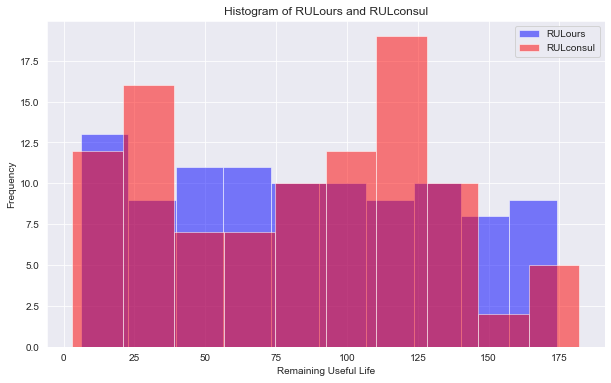

In [97]:
# Plotting histograms
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Histogram for RULours
plt.hist(df_combined['RULours'], bins=10, alpha=0.5, label='RULours', color='blue')

# Histogram for RULconsul
plt.hist(df_combined['RULconsul'], bins=10, alpha=0.5, label='RULconsul', color='red')

# Adding labels and title
plt.xlabel('Remaining Useful Life')
plt.ylabel('Frequency')
plt.title('Histogram of RULours and RULconsul')
plt.legend(loc='upper right')

# Show plot
plt.show()

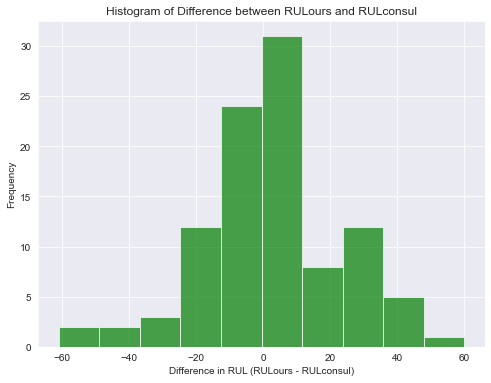

In [98]:
# Calculate the difference between RULours and RULconsul
df_combined['Difference'] = df_combined['RULours'] - df_combined['RULconsul']

# Plotting the histogram of the differences
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
plt.hist(df_combined['Difference'], bins=10, color='green', alpha=0.7)
plt.xlabel('Difference in RUL (RULours - RULconsul)')
plt.ylabel('Frequency')
plt.title('Histogram of Difference between RULours and RULconsul')
plt.grid(True)  # Optional: adds a grid for easier readability
plt.show()